In [1]:
import math
import os
import numpy as np


i = 0.4552518  #0.5390870
j = 0.8390081  #-0.6424589
k = 0.2980122  #0.5446390
xy = i*i + j*j




if(i>0 and j>0):
    pass
    angleC = -math.atan2(i, j)
    angleA = -math.atan2(math.sqrt(xy), k)

if(i<0 and j>0):
    pass
    angleC = -math.atan2(i, j)
    angleA = -math.atan2(math.sqrt(xy), k)
if(i<0 and j<0):
    pass
    angleC = -(math.atan2(i, j) + math.pi)
    angleA = math.atan2(math.sqrt(xy), k)
if(i>0 and j<0):
    pass
    angleC = math.pi - math.atan2(i,j)
    angleA = math.atan2(math.sqrt(xy), k)
    #print('test angle: ', angleC*180/math.pi)
#angleC = math.atan2(i, j)
#angleA = math.atan2(math.sqrt(xy), k)
print('{0:s} {1:.3f}'.format('C angle is: ', angleC*180/math.pi))
print('{0:s} {1:.3f}'.format('A angle is: ', angleA*180/math.pi))

angleC = -50*math.pi/180
angleA = -45*math.pi/180
print('临时角度')
print(angleC)
print(angleA)

ci = np.array([[math.cos(angleC), -math.sin(angleC), 0], [math.sin(angleC), math.cos(angleC), 0], [0, 0, 1]])
print('绕C轴旋转变换矩阵: ')
print(ci)

ai = np.array([[1, 0, 0], [0, math.cos(angleA), -math.sin(angleA)], [0, math.sin(angleA), math.cos(angleA)]])
print('绕A轴旋转变换矩阵: ')
print(ai)

B = 30 * math.pi / 180
bi = np.array([[-math.sin(B), 0, math.cos(B)], [0, 1, 0], [math.cos(B), 0, math.sin(B)]])
print('绕Y轴旋转变换矩阵：')
print(bi)

x = -35.008722346
y = 41.721770628
z = 83.867056795
vec = np.array([[x,y,z]])
print('旋转前的点坐标为： ')
print(vec)
print(vec.shape)
lec = vec.T
print(lec)
print(lec.shape)

da = np.dot(ci,ai)  #再进行坐标值转换时，转换的原则不根据机床结构的角度转换原则，计算角度是根据机床洗头结构来决定先后顺序，在进行坐标变化时
#不是按照机床结构来， 按照当前坐标系，两次旋转到指定位置进行坐标变化，对应坐标系，先绕着X旋转A，再绕着Z旋转C，因此，角度变化矩阵为C.dot(A)的顺序
#进行计算，即为正确结果。
print('角度矩阵乘积: ')
print(da)
print('************************')
print('Matrix 乘积： ')
db = np.matmul(ai,ci)
print(db)
print('************************')
finalresult = np.dot(da,lec)
print('结果是: ')
print(finalresult)


C angle is:  -28.485
A angle is:  -72.662
临时角度
-0.8726646259971648
-0.7853981633974483
绕C轴旋转变换矩阵: 
[[ 0.64278761  0.76604444  0.        ]
 [-0.76604444  0.64278761  0.        ]
 [ 0.          0.          1.        ]]
绕A轴旋转变换矩阵: 
[[ 1.          0.          0.        ]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678  0.70710678]]
绕Y轴旋转变换矩阵：
[[-0.5        0.         0.8660254]
 [ 0.         1.         0.       ]
 [ 0.8660254  0.         0.5      ]]
旋转前的点坐标为： 
[[-35.00872235  41.72177063  83.86705679]]
(1, 3)
[[-35.00872235]
 [ 41.72177063]
 [ 83.86705679]]
(3, 1)
角度矩阵乘积: 
[[ 0.64278761  0.54167522  0.54167522]
 [-0.76604444  0.45451948  0.45451948]
 [ 0.         -0.70710678  0.70710678]]
************************
Matrix 乘积： 
[[ 0.64278761  0.76604444  0.        ]
 [-0.54167522  0.45451948  0.70710678]
 [ 0.54167522 -0.45451948  0.70710678]]
************************
结果是: 
[[45.52518282]
 [83.90080546]
 [29.80121764]]


In [2]:
#测试AB轴机床角度计算，及坐标变换
import math
import os
import numpy as np
import matplotlib.pyplot as plt


T = np.array([[0.6424589, 0.5446390, 0.5390870],
              [0.6424589, 0.5446390, -0.5390870],
              [-0.6424589, 0.5446390, -0.5390870],
              [-0.6424589, 0.5446390, 0.5390870],
              [0.6424589, -0.5446390, 0.5390870],
              [0.6424589, -0.5446390, -0.5390870],
              [-0.6424589, -0.5446390, 0.5390870],
              [-0.6424589, -0.5446390, -0.5390870]
             ])

V = np.array([[18.012790, -9.543885, 31.828044],
              [18.896715, -10.293225, -31.293655],
              [-40.351693, 4.000567, 18.421662],
              [-25.582592, 16.520945, -4.752826],
              [0.0, 0.0, 100.0],
              [0.0, 0.0, 100.0],
              [0.0, 0.0, 100.0],
              [0.0, 0.0, 100.0]
             ])




rotA = 0.0
rotB = 0.0

def ComputeAngle(i, j, k):
    global rotA
    global rotB

    xz = math.sqrt(i*i + k*k)

    #刀轴与Y轴夹角
    if j>=0:
        pass
        ay = math.atan2(xz, j)
        print('J > 0 情况')
        print('{0:s}{1:.3f}'.format('ay is: ', ay*180/math.pi))
        #A轴要旋转的角度即为，90-ay,方向为负
        rotA = -(90 - ay*180/math.pi)
        rotB = math.atan2(i, k)*180 / math.pi

    if j<0:
        pass
        ay = -math.atan2(j, xz)
        print('J < 0 情况')
        print('{0:s}{1:.3f}'.format('ay is: ', ay*180/math.pi))
        #A轴要旋转的角度即为，90-ay,方向为正
        rotA = ay*180/math.pi
        rotB = math.atan2(i, k)*180/math.pi
        
    return rotA, rotB
    

def newOrient(x, y, z, B, A):
    #先将角度值转换为弧度值
    UB = B * math.pi / 180
    UA = A * math.pi / 180
    #定义旋转变换矩阵
    transY = np.array([[math.cos(UB), 0, math.sin(UB)],
                      [0, 1, 0],
                      [-math.sin(UB), 0, math.cos(UB)]
                     ])
    transX = np.array([[1.0, 0.0, 0.0],
                       [0.0, math.cos(UA), -math.sin(UA)],
                       [0.0, math.sin(UA), math.cos(UA)]
                      ])
    oi = np.array([[x, y, z]])
    print(type(oi))
    oo = np.mat(oi)
    print(type(oo))
    op = oo.T
    print('X Y Z 的 shape：')
    print(op.shape)
    print(op)
    
    #进行旋转变换
    tp1 = np.dot(transY, transX)
    tp2 =np.dot(tp1, op)
    print('旋转变换后的shape: ')
    print(tp2.shape)
    print(tp2)
    print('旋转变换后的坐标 X Y Z：')
    print(tp2[0], tp2[1], tp2[2])

for n in range(8):
    ComputeAngle(T[n][0], T[n][1], T[n][2])
    newOrient(V[n][0], V[n][1], V[n][2], rotB, rotA)
    #输出计算的刀轴角度, 并设置输出精度
    print('第'+str(n)+'区域 A 轴旋转角度为：')
    print('{0:s}{1:.3f}'.format('A=', rotA))
    print('第'+str(n)+'区域 B 轴旋转角度为：')
    print('{0:s}{1:.3f}'.format('B=', rotB))
    print('*****************************')
    




J > 0 情况
ay is: 57.000
<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>
X Y Z 的 shape：
(3, 1)
[[18.01279 ]
 [-9.543885]
 [31.828044]]
旋转变换后的shape: 
(3, 1)
[[36.00848723]
 [ 9.33061971]
 [ 6.70068   ]]
旋转变换后的坐标 X Y Z：
[[36.00848723]] [[9.33061971]] [[6.70068]]
第0区域 A 轴旋转角度为：
A=-33.000
第0区域 B 轴旋转角度为：
B=50.000
*****************************
J > 0 情况
ay is: 57.000
<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>
X Y Z 的 shape：
(3, 1)
[[ 18.896715]
 [-10.293225]
 [-31.293655]]
旋转变换后的shape: 
(3, 1)
[[-27.95694657]
 [-25.67637091]
 [ -1.20924659]]
旋转变换后的坐标 X Y Z：
[[-27.95694657]] [[-25.67637091]] [[-1.20924659]]
第1区域 A 轴旋转角度为：
A=-33.000
第1区域 B 轴旋转角度为：
B=130.000
*****************************
J > 0 情况
ay is: 57.000
<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>
X Y Z 的 shape：
(3, 1)
[[-40.351693]
 [  4.000567]
 [ 18.421662]]
旋转变换后的shape: 
(3, 1)
[[ 15.77151351]
 [ 13.38831401]
 [-39.44152259]]
旋转变换后的坐标 X Y Z：
[[15.77151351]] [[13.38831401]]

In [3]:
array_one = np.ones([3,3])
array_zero = np.zeros([3,3])
print(array_one)
print(array_zero)
print(array_one.shape)
print(array_zero.shape)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(3, 3)
(3, 3)


In [4]:
sts = np.array([[80,88], [82,81],[84,75],[86,83],[75,81]])
print(sts)
print(sts.shape)
r1 = np.amax(sts, axis=0)
r2 = np.amax(sts, axis=1)
print('col max num is: ', r1)
print('row max num is: ', r2)

[[80 88]
 [82 81]
 [84 75]
 [86 83]
 [75 81]]
(5, 2)
col max num is:  [86 88]
row max num is:  [88 82 84 86 81]


In [5]:
stus_score = np.array([[80, 88], [82, 81], [84, 75], [86, 83], [75, 81]])
print("加分前:")
print(stus_score)

# 为所有平时成绩都加5分
stus_score[:, 0] = stus_score[:, 0]+5
print("加分后:")
print(stus_score)



加分前:
[[80 88]
 [82 81]
 [84 75]
 [86 83]
 [75 81]]
加分后:
[[85 88]
 [87 81]
 [89 75]
 [91 83]
 [80 81]]


In [6]:
stus_score = np.array([[80, 88], [82, 81], [84, 75], [86, 83], [75, 81]])
print("减半前:")
print(stus_score)

# 平时成绩减半
stus_score[:, 0] = stus_score[:, 0]*0.5
print("减半后:")
print(stus_score)


减半前:
[[80 88]
 [82 81]
 [84 75]
 [86 83]
 [75 81]]
减半后:
[[40 88]
 [41 81]
 [42 75]
 [43 83]
 [37 81]]


In [7]:
#矩阵运算相关
stus_score = np.array([[80, 88], [82, 81], [84, 75], [86, 83], [75, 81]])
# 平时成绩占40% 期末成绩占60%, 计算结果
q = np.array([[0.4], [0.6]])
print('q:')
print(q)
result = np.dot(stus_score, q)   #这里表示的是矩阵乘积
print("最终结果为:")
print(result)

q:
[[0.4]
 [0.6]]
最终结果为:
[[84.8]
 [81.4]
 [78.6]
 [84.2]
 [78.6]]


In [8]:
#矩阵拼接
#矩阵的垂直拼接

print("v1为:")
v1 = [[0, 1, 2, 3, 4, 5],
      [6, 7, 8, 9, 10, 11]]
print(v1)

print("v2为:")
v2 = [[12, 13, 14, 15, 16, 17], 
      [18, 19, 20, 21, 22, 23]]
print(v2)

# 垂直拼接
result = np.vstack((v1, v2))
print("v1和v2垂直拼接的结果为")
print(result)
print(result.shape)


v1为:
[[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11]]
v2为:
[[12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23]]
v1和v2垂直拼接的结果为
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
(4, 6)


In [9]:
#矩阵水平拼接
print("v1为:")
v1 = [[0, 1, 2, 3, 4, 5],
      [6, 7, 8, 9, 10, 11]]
print(v1)
print("v2为:")
v2 = [[12, 13, 14, 15, 16, 17], 
      [18, 19, 20, 21, 22, 23]]
print(v2)
# 垂直拼接
result = np.hstack((v1, v2))
print("v1和v2水平拼接的结果为")
print(result)


v1为:
[[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11]]
v2为:
[[12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23]]
v1和v2水平拼接的结果为
[[ 0  1  2  3  4  5 12 13 14 15 16 17]
 [ 6  7  8  9 10 11 18 19 20 21 22 23]]


In [10]:
import numpy as np

vec1 = np.array([[1,2],[3,4]])
vec2 = np.array([[2,1],[4,3]])
print(vec1 + vec2)
print(np.add(vec1, vec2))
print('*************************')

print(vec2*3)
print('普通乘法：')
print(vec1*vec2)
print('矩阵乘法')
print(np.dot(vec1, vec2))
print(vec1.T)
print(vec2.T)
print(np.sum(vec1))
print(np.sum(vec2))
print('***************************')
print('第一种矩阵乘法', vec1.dot(vec2))
print('第二种矩阵乘法', np.dot(vec1, vec2))

origin = vec1.dot(vec2)
transform = origin.T
Iop = np.linalg.inv(origin)
opsite = np.mat(origin)
Iopsite = opsite.I
print(origin)
print(transform)
print(opsite)
print(Iop)
print('************')
print(Iopsite)


[[3 3]
 [7 7]]
[[3 3]
 [7 7]]
*************************
[[ 6  3]
 [12  9]]
普通乘法：
[[ 2  2]
 [12 12]]
矩阵乘法
[[10  7]
 [22 15]]
[[1 3]
 [2 4]]
[[2 4]
 [1 3]]
10
10
***************************
第一种矩阵乘法 [[10  7]
 [22 15]]
第二种矩阵乘法 [[10  7]
 [22 15]]
[[10  7]
 [22 15]]
[[10 22]
 [ 7 15]]
[[10  7]
 [22 15]]
[[-3.75  1.75]
 [ 5.5  -2.5 ]]
************
[[-3.75  1.75]
 [ 5.5  -2.5 ]]


In [11]:
a = np.array([[1,1,1],[0,2,5],[2,5,-1]])
print('数组 a:')
print(a)
ainv = np.linalg.inv(a)

print('a 的逆: ')
print(ainv)

print('计算： b: ')
b = np.array([[6], [-4], [27]])
print(b)

print('计算： A^(-1)B: ')
x = np.linalg.solve(a,b)
print(x)


数组 a:
[[ 1  1  1]
 [ 0  2  5]
 [ 2  5 -1]]
a 的逆: 
[[ 1.28571429 -0.28571429 -0.14285714]
 [-0.47619048  0.14285714  0.23809524]
 [ 0.19047619  0.14285714 -0.0952381 ]]
计算： b: 
[[ 6]
 [-4]
 [27]]
计算： A^(-1)B: 
[[ 5.]
 [ 3.]
 [-2.]]


a style: 
(2, 2)
[[1 2]
 [3 4]]
b style: 
(2,)
[10 20]
*****************
[[10 40]
 [30 80]]
*****************
(2, 2)
(1, 2)
[[ 50]
 [110]]


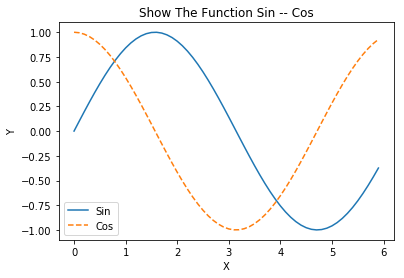

In [12]:
a = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])

c = np.mat(a)
d = np.mat(b)

print('a style: ')
print(a.shape)
print(a)
print('b style: ')
print(b.shape)
print(b)
print('*****************')
print(a * b)
print('*****************')
print(c.shape)
print(d.shape)
print(c * d.T)

#显示图形
x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label='Sin')
plt.plot(x, y2, linestyle='--', label='Cos')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Show The Function Sin -- Cos')
plt.legend()
plt.show()



In [13]:
#使用权重和偏置实现与门
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1



def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1
    
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1
    
#采用与门，与非门，或门的叠加构成异或门
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

    
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

print('******************')
print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))


0
0
0
1
******************
0
1
1
0


In [14]:
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
k = w*x
print(k)
print(np.sum(k))
print(np.sum(k) + b)

[0.  0.5]
0.5
-0.19999999999999996


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


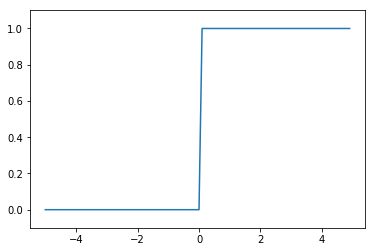

In [15]:
def step_function(x):
    return np.array(x>0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
print(y)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()


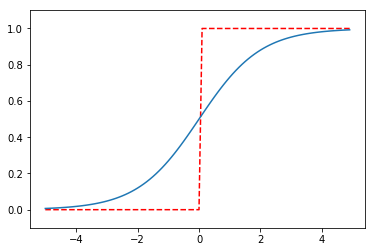

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, linestyle='--', color='r')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()


In [17]:
def relu(x):
    return np.maximum(0, x)




In [18]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8,9])
print(A)
print(B)
print(np.ndim(A))
print(A.shape)
print(B.shape)
print(np.dot(B,A))


[[1 2]
 [3 4]
 [5 6]]
[7 8 9]
2
(3, 2)
(3,)
[ 76 100]


In [19]:
#实现神经网络内积
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(X.shape)
print(W1.shape)
print(B1.shape)
A1 = np.dot(X, W1) + B1
print('**********第一层***********')
print(A1)
#第一层的激活函数，并输出Z1
Z1 = sigmoid(A1)
print(Z1)

#实现第1层到第二层的信号传递
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
print('**********第二层***********')
print(A2)
#第二层调用激活函数后输出结果
Z2 = sigmoid(A2)
print(Z2)

#第二层到输出层
#定义单独的隐藏函数
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print('**********输出层结果***********')
print(Y)


(2,)
(2, 3)
(3,)
**********第一层***********
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)
**********第二层***********
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
**********输出层结果***********
[0.31682708 0.69627909]


In [20]:
#定义softmax函数
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #防止a值过大，造成计算溢出进行的处理，exp(a) == exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y



In [21]:
import math
import os, sys
import numpy as np
import matplotlib.pylab as plt
import mnist
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)
print(os.path)


(60000, 784)
(60000,)
(10000, 784)
(10000,)
<module 'ntpath' from 'C:\\ProgramData\\Anaconda3\\Lib\\ntpath.py'>


In [22]:
import sys, os
import pickle
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)




5
(784,)
(28, 28)


In [23]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) #获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1
print('Accuracy:' + str(float(accuracy_cnt) / len(x)))



# x, t = get_data()
# network = init_network()
# W1, W2, W3 = network['W1'], network['W2'], network['W3']

# print(x.shape)
# print(x[0].shape)
# print(W1.shape)
# print(W2.shape)
# print(W3.shape)

#批处理处理方法
x, t = get_data()
network = init_network()

batch_size = 100 #批数量
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    print('P is :')
    print(p)
    print('**********************')
    print('T is :')
    print(t[i:i+batch_size])
    
print('New Counting Accuracy: ' + str(float(accuracy_cnt) / len(x)))



Accuracy:0.9352
P is :
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 2 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9]
**********************
T is :
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
P is :
[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 4 9 0 5 8 5 6 6 5 7 8 1 0
 1 6 4 6 7 3 1 7 1 8 2 0 9 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3
 2 7 1 8 1 8 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2]
**********************
T is :
[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0
 1 6 4 6 7 3 1 7 1 8 2 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3
 2 7 1 8 1 8 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2]
P is :
[3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 5 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 7 7 9 2
 2 4 1 5 8 8

 2 8 1 5 1 0 2 3 3 5 7 0 6 8 6 3 9 9 8 2 7 7 1 0 1 7]
P is :
[8 9 0 1 2 9 4 5 6 7 8 0 1 2 3 4 7 8 9 7 8 6 4 1 9 2 8 4 4 7 0 1 9 2 8 7 8
 2 6 0 0 6 3 5 9 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 3 2 4 9
 4 3 6 4 1 7 2 6 2 0 1 2 8 4 5 6 7 8 9 0 1 2 3 4 5 6]
**********************
T is :
[8 9 0 1 2 3 4 5 6 7 8 0 1 2 3 4 7 8 9 7 8 6 4 1 9 3 8 4 4 7 0 1 9 2 8 7 8
 2 6 0 6 5 3 3 3 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 5 2 4 9
 4 3 6 4 1 7 2 6 5 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6]
New Counting Accuracy: 0.9352


In [24]:
# x = np.array([[0.1, 0.8, 0.1],[0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
# y = np.argmax(x, axis=1)
# print(y)
#验证得出，axis=0 是制定列，axis=1是指定每行
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
print(np.sum(y==t))


[ True  True False  True]
3


In [25]:
#均方误差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

#交叉熵误差
def cross_entropy_error(y, t):
    delta = 1e-7       #这里加入了一个微小值，防止当y=0时，log（0） 会变为无限大-inf，会导致后面运算出错，作为保护性政策，添加微小值，防止无穷大发生。
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + delta)) / batch_size

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
#t = [0, 2, 4, 3, 1, 7, 5, 6, 9, 8]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y), np.array(t)))
print(cross_entropy_error(np.array(y), np.array(t)))



#not one_hot style
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    print('t:')
    print(t)
    print('y:')
    print(y)
    print('******************************')
    batch_size = y.shape[0]
    print('batch_size :' + str(batch_size))
    print(y[np.arange(batch_size), t])
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


print(cross_entropy_error(np.array(y), np.array(t)))

0.09750000000000003
0.510825457099338
t:
[[0 0 1 0 0 0 0 0 0 0]]
y:
[[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]]
******************************
batch_size :1
[[0.1  0.1  0.05 0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]]
23.718987110506905


C:\ProgramData\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


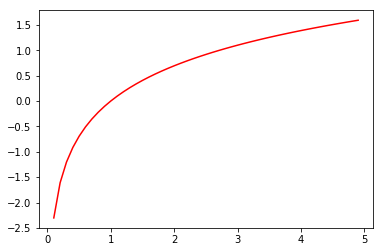

In [26]:
x = np.arange(-5, 5, 0.1)
y = np.log(x)
plt.plot(x, y, color='r')
plt.show()

In [27]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print('x_train')
print(x_train)
print('X_train Size is: ')
print(x_train.size)
print('train_size:')
print(train_size)
print('other size:')
print('**************************************************')
print('batch_mask')
print(batch_mask)
print(x_train.shape[1])
print('x_batch')
print(x_batch)
print('t_batch')
print(t_batch)
print(x_batch.shape)
print(t_batch.shape)
print(x_train.ndim)
print(x_train.size)
print(t_train.size)

print('**********************************')
print('Test...............................')
k = np.array([[1,1,1,1,1,1,1,],[2,2,2,2,2,2,2],[3,3,3,3,3,3,3,],[4,4,4,4,4,4,4]])
print(k)
print('K shape')
print(k.shape)
print('K size:')
print(k.size)

(60000, 784)
(60000, 10)
x_train
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_train Size is: 
47040000
train_size:
60000
other size:
**************************************************
batch_mask
[45271 24392 53766 14881 19343 53729  4805  3360 53420 22491]
784
x_batch
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
t_batch
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
(10, 784)
(10, 10)
2
47040000
600000
**********************************
Test...............................
[[1 1 1 1 1 1 1

0.1999999999990898
0.2999999999986347
0.1999999999990898


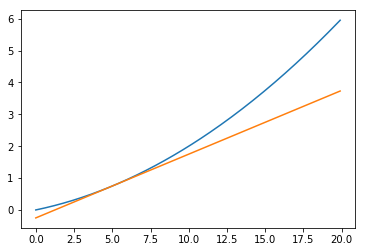

In [28]:
#导数 即数值积分
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h)) / (2*h)

#一个测试函数例子
def function_1(x):
    return 0.01*x**2 + 0.1*x

#创建相切直线函数
def tangent_line(f, x):
    d = numerical_diff(f, x) #带入5，通过计算导数函数计算的d，即为直线的斜率
    #print('d is :')
    print(d)
    y = f(x) - d*x   #这里过5这个点的坐标（5，f（5））同时也在直线上，通过该式计算出，相切直线在Y轴上的焦点
    #print('f(x) is :')
    #print(f(x))
    return lambda t: d*t + y   #返回直线函数



#计算在5， 10处的导数
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

#绘制函数图像
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.xlabel = 'X'
plt.ylabel = 'f(x)'

#设置切线相关
tf = tangent_line(function_1, 5) #tf即返回的直线函数
z = tf(x)

# print('****************************************')
# #tangent_line(function_1, 5)
# print('****************************************')

plt.plot(x, y)
plt.plot(x, z)
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

#偏导数
def function_2(x):
    #return x[0]**2 + x[1]**2
    return np.sum(x**2)   #这里假定传入的时数组


#定义梯度函数
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) #生成和x形状相同,但值都为0的数组
    
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val  #还原值
        
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))





#绘制函数图像
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
y = function_2(x)

plt.xlabel = 'X'
plt.ylabel = 'f(x)'



[6. 8.]
[0. 4.]
[6. 0.]


In [30]:
#定义梯度下降法
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x


init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100)   #学习率的大小至关重要，太大容易发散，太小开没开始循环就结束了


array([-6.11110793e-10,  8.14814391e-10])

In [31]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)  #用高斯分布进行初始化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    

net = simpleNet()
print(net.W)  #打印权重参数
x = np.array([0.6, 0.9])
p = net.predict(x)
print('P is :')
print(p)
nummax = np.argmax(p)
print(nummax)   #最大索引
t = np.array([0, 0, 1]) #正确解标签
net.loss(x, t)

def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print('梯度：')
print(dW)

[[-0.33884921  0.21366662  2.5072953 ]
 [-2.3027629  -0.07890363  0.61501896]]
P is :
[-2.27579614  0.0571867   2.05789424]
2
梯度：
[[ 0.0068545   0.07066062 -0.07751512]
 [ 0.01028175  0.10599093 -0.11627268]]


In [32]:
#两岑神经网络的实现
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    
        #初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x 输入数据， t 监督数据
    #定义损失函数
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
            
        grad = {}
        grad['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grad['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grad['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grad['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grad
    
    
# net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
# x = np.random.rand(100, 784)
# t = np.random.rand(100, 10)
# print(net.params['W1'].shape)
# print(net.params['b1'].shape)
# print(net.params['W2'].shape)
# print(net.params['b2'].shape)

#grads = net.numerical_gradient(x, t)
# print(grads['W1'].shape)
# print(grads['b1'].shape)
# print(grads['W2'].shape)
# print(grads['b2'].shape)
# grads['W1'].shape
# grads['b1'].shape
# grads['W2'].shape
# grads['b2'].shape





In [33]:
#使用MINIST数据集进行学习
# import numpy as np
# from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# train_loss_list = []
# train_acc_list = []
# test_acc_list = []
# #平均每个epoch的重复次数
# iter_per_epoch = max(train_size / batch_size, 1)

# #超参数
# iters_num = 1000  #梯度更新次数（循环次数）
# train_size = x_train.shape[0]  
# batch_size = 100
# learning_rate = 0.1   #学习率
# network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# for i in range(iters_num):
#     #获取mini_batch
#     batch_mask = np.random.choice(train_size, batch_size)
#     x_batch = x_train[batch_mask]
#     t_batch = t_train[batch_mask]
    
#     #计算梯度
#     grad = network.numerical_gradient(x_batch, t_batch)
#     #grad = network.gradient(x_batch, t_batch)   高速版 误差反响传播法
    
#     #更新参数
#     for key in ('W1', 'b1', 'W2', 'b2'):
#         network.params[key] -= learning_rate * grad[key]
        
#     #记录学习过程
#     loss = network.loss(x_batch, t_batch)
#     train_loss_list.append(loss)
#     #计算每个epoch的识别精度
#     if i % iter_per_epoch == 0:
#         train_acc = network.accuracy(x_train, t_train)
#         test_acc = network.accuracy(x_test, t_test)
#         train_acc_list.append(train_acc)
#         test_acc_list.append(test_acc)
#         #print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))
    
    
# #绘制图形
# markers = {'train': 'o', 'test': 's'}
# x = np.arange(len(train_acc_list))
# plt.plot(x, train_acc_list, label='train acc')
# plt.plot(x, test_acc_list, label='test acc')
# plt.xlabel = 'epochs'
# plt.ylabel = 'accruacy'
# plt.ylim(0, 1.0)
# plt.legend(loc='lower right')
#plt.show()


In [34]:
#误差反响传播
#实现乘法层,作为一个类添加，并含有一个正向，一个反向
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x*y
        
        return out
        
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy

#实现加法层
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy
    

    
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

#layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

#forward
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)
print('Apple And Orange price are :')
print(price)

#backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)

print('{0:s} {1:.3f}, {2:.3f}, {3:.3f}, {4:.3f}, {5:.3f}'.format('dapple, dapple_num, dorange, dorange_num, dtax', dapple, dapple_num, dorange, dorange_num, dtax))


Apple And Orange price are :
715.0000000000001
dapple, dapple_num, dorange, dorange_num, dtax 2.200, 110.000, 3.300, 165.000, 650.000


In [35]:
#实现Relu层
import numpy as np
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
        
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx
    
#实现sigmoid层，省去中间琐碎环节，只根据最后输出结果y，即可计算出来反向传播输出
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out)* self.out
        return dx
    
#Affine/Softmax层的实现
class Affine:
    def __init__(self, w, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx
    
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None #损失
        self.y = None
        self.t = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss
    
    def  backward(self, dout=1):
        batch_size = self.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx
    
# x = np.array([[1.0, -0.5],[-2.0, 3.0]])
# print(x)
# mask = (x <= 0)
# print(mask)


In [36]:
#误差反响传播的实现
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    
        #初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        #生成层
        self.layers = OrderedDict()
        self.layers['Affinel'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affinel2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()
        
        
    def predict(self, x):
        for layer in self.layer.values():
            x = layers.forward(x)
            
        return x
    
    #x 输入数据  t 监督数据
    def loss(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    #x 输入数据   t 监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        #forward
        self.loss(x, t)
        
        #backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        #设定
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads
    

In [37]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.momentum = momentum
        self.lr = lr
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in parmas.keys():
            self.v[key] = self.momnetum*self.v[key] - self.lr*grads[key]
            prams[key] += self.v[key]
            
            
            
            
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in parmas.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
            
            


In [38]:
print(0.01 * np.random.randn(3,6))

[[ 0.00285098  0.00706619 -0.00280616 -0.01193614  0.02615073 -0.00090391]
 [ 0.00555731  0.00304053  0.0078259  -0.01226045  0.000131    0.0050374 ]
 [-0.0003845   0.00715465 -0.01826399  0.0118352   0.0063267  -0.00258106]]


In [3]:
import os
import sys

sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.upadate(network.params.grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
            
            
#绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()










AttributeError: 'SGD' object has no attribute 'upadate'

In [9]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask
    

In [10]:
#从训练数据中分离验证数据
(x_train, t_train), (x_test, t_test) = load_mnist()

#打乱训练数据
x_train, t_train = shuffle_dataset(x_train, t_train)

#分割验证数据
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation:]
t_train = t_train[validation:]




#设置超参数取值范围
weight_decay = 10 ** np.random.uniform(-8, -4)   #权值衰减系数
lr = 10 **np.random.uniform(-6, -2)    #学习率范围



NameError: name 'shuffle_dataset' is not defined

In [2]:
import numpy as np
import os, sys

x = np.random.rand(10, 1, 28, 28)
print(x[0].shape)
print(x.shape)


import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2= im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)


(1, 28, 28)
(10, 1, 28, 28)
(9, 75)
(90, 75)


In [1]:
class Convolution:
    def __init__(self, W, b, strid=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.steide, self.pad)
        col_W = self.W.reshape(FN, -10)  #滤波器的展开
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        return out

    

In [4]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride 
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool.h) / self.stride)
        out_w = int(1 + (W - self.pool.w) / self.stride)
        
        #展开
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        #最大值
        out = np.max(col, axis=1)
        #转换3
        out = out.reshape(N, out_h, out_w, C).tranpose(0, 3, 1, 2)
        
        return out
    



SyntaxError: invalid syntax (<ipython-input-4-89f3ad1fd850>, line 8)

In [5]:
x = np.array([[1,3,4,6],[8,9,6,1],[10,9,5,3],[3,1,5,7]])
print(x)
raw_x = np.max(x, axis=1)
col_x = np.max(x, axis=0)
print(raw_x)
print(col_x)

[[ 1  3  4  6]
 [ 8  9  6  1]
 [10  9  5  3]
 [ 3  1  5  7]]
[ 6  9 10  7]
[10  9  6  7]


In [7]:
from scipy import sparse
eye = np.eye(4)
print(eye)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [21]:
def sum_of_list(N):
    total =0
    for i in range(5):
        L = [j^(j>>i) for j in range(N)]
        total += sum(L)
    return total



In [24]:
#%prun sum_of_list(10000)

In [1]:
import numpy as np
k = np.array([range(i, i+3) for i in [2, 4, 6]])
print(k)

[[2 3 4]
 [4 5 6]
 [6 7 8]]


In [2]:
ori = np.arange(1,10)
grid = np.arange(1, 10).reshape((3,3))
print(grid)
print(ori)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]


In [3]:
x = np.array([1,2,3])
#print(x)
#x.reshape((1,3))
print(x.shape)


(3,)


In [4]:
k = x[:, np.newaxis]
print(x)
print(k)
print(x.shape)
print(k.shape)

[1 2 3]
[[1]
 [2]
 [3]]
(3,)
(3, 1)


In [5]:
x = np.array([1,2,3])
y = np.array([3,2,1])
z = np.array([99,98,97])
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 98, 97])

In [6]:
grid = np.array([[1,2,3],[4,5,6]])
np.concatenate([grid, grid])
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [7]:
np.vstack([x, grid])

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [8]:
y = np.array([[99],[98]])
np.hstack([y, grid])

array([[99,  1,  2,  3],
       [98,  4,  5,  6]])

In [9]:
x = [1, 2, 3, 99, 97, 3, 2, 1]

x1, x2, x3, x4 = np.split(x, [2,4,6])
print(x1, x2, x3, x4)

[1 2] [ 3 99] [97  3] [2 1]


In [10]:
grid = np.arange(16).reshape((4,4))
print(grid)

upper, lower = np.vsplit(grid, [3])
print(upper)
print(lower)
left, right = np.hsplit(grid, [2])
print('****************************')
print(left)
print(right)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[12 13 14 15]]
****************************
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


In [11]:
theta = np.linspace(0, np.pi, 3)
print('theta = ', theta)
print('sin(theta) = ', np.sin(theta))
print('cos(theta) = ', np.cos(theta))
print('tan(theta) = ', np.tan(theta))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [12]:
x = np.arange(5)
y = np.zeros(10)
print(y)
np.power(2, x, out=y[::2])
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


In [13]:
a = np.arange(1,6)
np.add.reduce(a)
np.add.accumulate(a)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [14]:
x = np.arange(1,10)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [15]:
M = np.random.random((3,4))
print(M)

print(M.sum())
print(M.min(axis=0))

[[0.94295034 0.95652374 0.27980767 0.42404701]
 [0.34378546 0.49527318 0.84071244 0.37496491]
 [0.98775839 0.91502181 0.92419551 0.36928097]]
7.854321422286157
[0.34378546 0.49527318 0.27980767 0.36928097]


All president heights: 
    order                    name  height(cm)
0       1       George Washington         189
1       2              John Adams         170
2       3        Thomas Jefferson         189
3       4           James Madison         163
4       5            James Monroe         183
5       6       John Quincy Adams         171
6       7          Andrew Jackson         185
7       8        Martin Van Buren         168
8       9  William Henry Harrison         173
9      10              John Tyler         183
10     11           James K. Polk         173
11     12          Zachary Taylor         173
12     13        Millard Fillmore         175
13     14         Franklin Pierce         178
14     15          James Buchanan         183
15     16         Abraham Lincoln         193
16     17          Andrew Johnson         178
17     18        Ulysses S. Grant         173
18     19     Rutherford B. Hayes         174
19     20       James A. Garfield         183
20     21 

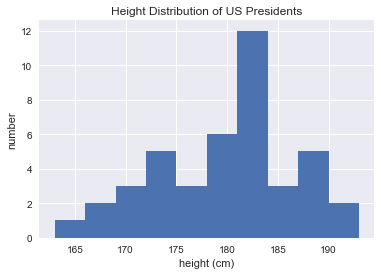

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

data = pd.read_csv('president_heights.csv')
print('All president heights: ')
print(data)
print('****************************************')
heights = np.array(data['height(cm)'])
print(heights)
print('****************************************')
print('Mean height:      ', heights.mean())
print('Standard deviation:',heights.std())
print('Minimum height:    ', heights.min())
print('Maximum height:    ', heights.max())
print('25th percentile:   ', np.percentile(heights, 25))
print('Median:            ', np.median(heights))
print('75th percnetile: ', np.percentile(heights, 75))
print('*****************************************')
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')
plt.show()

In [27]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)
print(a+b)

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [31]:
x = np.random.random((10,3))
Xmean = x.mean(0)
print(Xmean)
X_centered = x - Xmean
print(X_centered)

[0.50601799 0.6273566  0.59592768]
[[ 0.2818887   0.05349184  0.22474723]
 [-0.22283835  0.12631145  0.28136055]
 [-0.45121373 -0.11207625 -0.30953925]
 [ 0.3509502   0.12448418 -0.1218876 ]
 [-0.15522699  0.21276873  0.25476639]
 [ 0.47882361 -0.06373594 -0.29188637]
 [ 0.46729929 -0.12499737  0.10027054]
 [-0.38022557 -0.1327859   0.39492969]
 [ 0.00138591 -0.45200868 -0.31175738]
 [-0.37084308  0.36854794 -0.22100379]]
